<a href="https://colab.research.google.com/github/harishmuh/Deep-Learning_study/blob/main/RNN_LSTM_Iris_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Recurrent Neural Network (RNN) - Iris flower classification**

---


### **Context**

* This tutorial is the continuation of previous iris flower identification with MLP tutorial. You can see the previous tutorial [here](https://github.com/harishmuh/Deep-Learning-Specialization---Andrew-Ng/blob/main/MLP_tensorflow_iris_flower.ipynb).  

* For this tutorial, we explore how to apply a Recurrent Neural Network (RNN) to structured tabular data.

### **About dataset**

The Iris dataset is a classical supervised classification dataset containing 150 samples of iris flowers across three species.

**Dataset Characteristics:**

* Total samples: 150

* Number of features: 4

* Number of classes: 3

* Type: Supervised multi-class classification

**Features:**

* Sepal length (cm)

* Sepal width (cm)

* Petal length (cm)

* Petal width (cm)

**Target Classes:**

* 0 → Setosa

* 1 → Versicolor

* 2 → Virginica

### **Recurrent Neural Network**

RNN is method of deep learning to solve time-series data problem or data that involving order. So, RNN concept is to detect pattern in previous time-series data or previous order, and try to predict what will be the next.

In this experiment, we will conduct RNN hands-on with Long Short-Term Memory (LSTM). LSTM is one kind of RNN architecture variances.

In [6]:
# Importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')

# style
plt.style.use('ggplot')


In [7]:
# Loading dataset # iris
uci_datasets = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(uci_datasets, header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# data dimension
df.shape

(150, 5)

In [9]:
# Rename columns
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Features and targets
X = df.drop('class', axis=1)
y = df['class']

In [11]:
# Replacing values # label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y1 = le.fit_transform(y)
y = pd.get_dummies(y1).values

In [12]:
# Data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
print('Data Training: ')
print(X_train.shape)
print(y_train.shape)
print('Data Testing: ')
print(X_test.shape)
print(y_test.shape)

Data Training: 
(120, 4)
(120, 3)
Data Testing: 
(30, 4)
(30, 3)


**Reshaping the input into 3D**

In [14]:
# Reshaping X_train from 2D into 3D
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train_reshaped.shape

(120, 4, 1)

In [15]:
# Reshaping X_test from 2D into 3D
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
X_test_reshaped.shape

(30, 4, 1)

In [16]:
n_timesteps = X_train_reshaped.shape[1]
n_features = X_train_reshaped.shape[2]

In [17]:
# Import library for deep learning
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score

**Initiating input layer**

In [18]:
# Defining model
modelLSTM = tf.keras.Sequential()

# Input layer
modelLSTM.add(tf.keras.layers.Input(shape=(n_timesteps, n_features)))

**Initiating hidden layer**

In [19]:
# Initiating hidden layer

# Hidden layer
modelLSTM.add(tf.keras.layers.LSTM(10)) # 10 block LSTM or Neuron

**Initiating output layer**

In [20]:
# Initiating output layer
# Output layer is fully connected layer

# Output layer
modelLSTM.add(tf.keras.layers.Dense(3, activation='softmax')) # 3 labels # softmax: multiclass problem

**Compiling**

In [21]:
modelLSTM.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

modelLSTM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

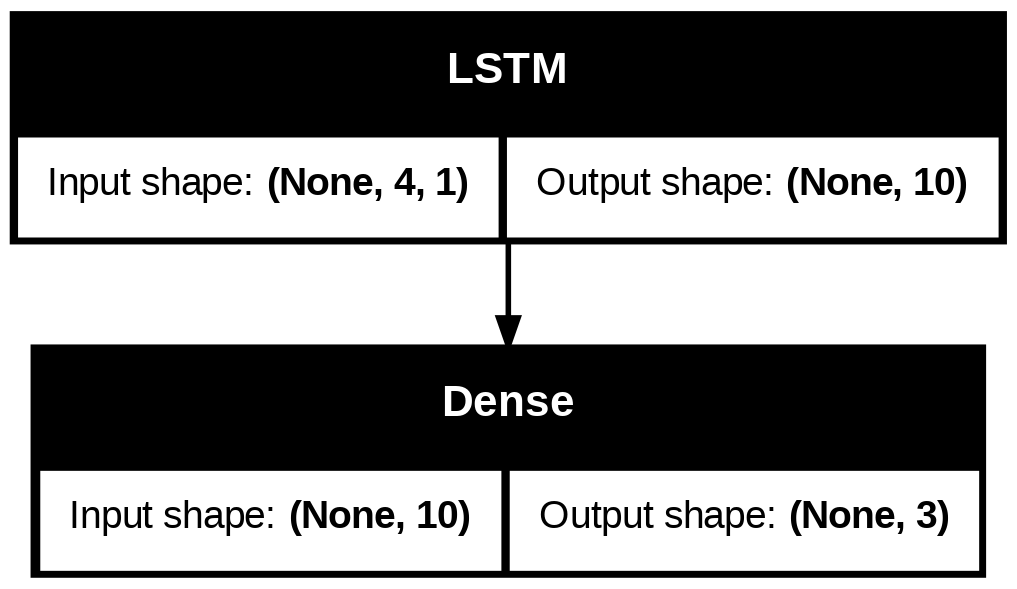

In [22]:
# Plotting architecture
plot_model(modelLSTM, 'modelLSTM.png', show_shapes=True)

**Training model**

In [23]:
historyLSTM = modelLSTM.fit(X_train_reshaped, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.1953 - loss: 1.1166 - val_accuracy: 0.2917 - val_loss: 1.1290
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3724 - loss: 1.0882 - val_accuracy: 0.2917 - val_loss: 1.1192
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3646 - loss: 1.0705 - val_accuracy: 0.2917 - val_loss: 1.1197
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3880 - loss: 1.0531 - val_accuracy: 0.2917 - val_loss: 1.1096
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3763 - loss: 1.0425 - val_accuracy: 0.2917 - val_loss: 1.0833
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4076 - loss: 1.0006 - val_accuracy: 0.2917 - val_loss: 1.0627
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3880 - loss: 0.9815 - val_accuracy: 0.2917 - val_loss: 1.0188
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4674 - loss: 0.9630 - val_accuracy: 0.5417 - val_loss

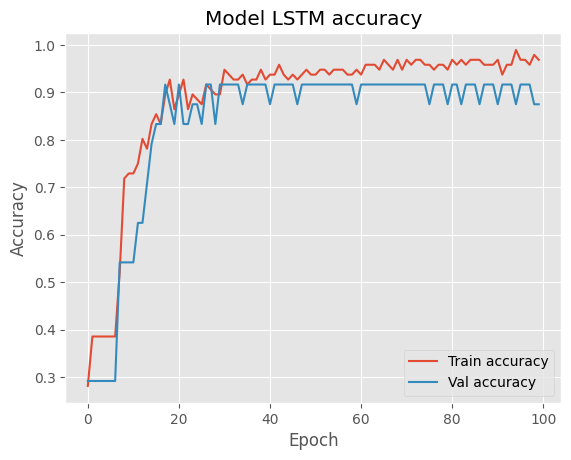

In [24]:
# Plotting accuracy
plt.plot(historyLSTM.history['accuracy'])
plt.plot(historyLSTM.history['val_accuracy'])
plt.title('Model LSTM accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Val accuracy'], loc='lower right')
plt.show()

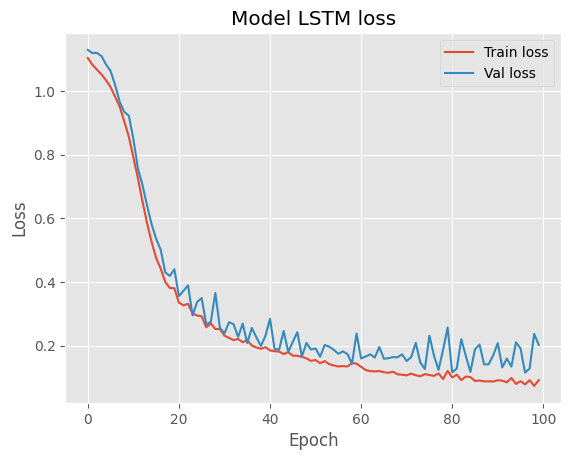

In [25]:
# Plotting loss
plt.plot(historyLSTM.history['loss'])
plt.plot(historyLSTM.history['val_loss'])
plt.title('Model LSTM loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Val loss'], loc='upper right')
plt.show()

In [26]:
y_pred_LSTM = modelLSTM.predict(X_test_reshaped)
y_pred_LSTM

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


array([[3.73824987e-05, 4.78470419e-03, 9.95177865e-01],
       [1.05724605e-02, 9.82469201e-01, 6.95826020e-03],
       [9.91405368e-01, 8.57954565e-03, 1.51570330e-05],
       [5.11365615e-05, 5.97950211e-03, 9.93969262e-01],
       [9.92037296e-01, 7.94473756e-03, 1.79623676e-05],
       [9.09321807e-06, 1.09000632e-03, 9.98901010e-01],
       [9.92416382e-01, 7.56266760e-03, 2.09561731e-05],
       [4.94501926e-03, 6.71100557e-01, 3.23954403e-01],
       [5.64345578e-03, 7.39848197e-01, 2.54508317e-01],
       [7.42477644e-03, 9.73927617e-01, 1.86475161e-02],
       [1.62314042e-03, 1.93470865e-01, 8.04906011e-01],
       [5.71989594e-03, 7.92743444e-01, 2.01536775e-01],
       [7.10143568e-03, 9.21686947e-01, 7.12115094e-02],
       [5.45273395e-03, 7.33995795e-01, 2.60551393e-01],
       [5.91354957e-03, 7.90388227e-01, 2.03698218e-01],
       [9.92780626e-01, 7.20010279e-03, 1.92521329e-05],
       [5.75644150e-03, 7.88614511e-01, 2.05629066e-01],
       [7.54416175e-03, 9.57318

In [27]:
y_test_class = np.argmax(y_test, axis=1)
y_test_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [28]:
y_pred_class_LSTM = np.argmax(y_pred_LSTM, axis=1)
y_pred_class_LSTM

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [29]:
import sklearn
from sklearn.metrics import accuracy_score
print('Accuracy on the test data', accuracy_score(y_test_class, y_pred_class_LSTM))

Accuracy on the test data 1.0


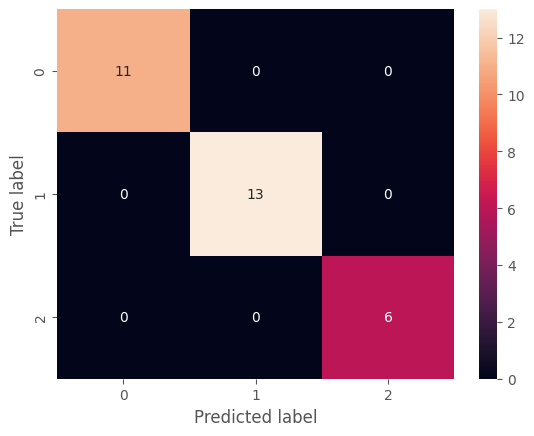

In [30]:
# Heatmap confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test_class, y_pred_class_LSTM)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()